In [1]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

## Controlador proporcional

Un controlador porporcional responde a la siguiente ley en el dominio temporal:

$$e(t)=K_pu(t)$$

Se puede notar de la ecuación anterior que la acción de control es porporcional al error.

Este sistema controlador es estático, es decir que los valores de la salida del mismo (señal de entrada a la planta $u(t)$) solo depende de los valores de su entrada (señal de error $e(t)=y(t)-r(t)$).

Si transformamos al dominio de Laplace la ley de controlador anterior obtenemos que la función transferencia es:

$$\frac{U(s)}{E(s)}=K$$


Este controlador puede ser util para reducir el error de estado estacionario y puede mejorar la dinámica (hacerlo más rápido) a sistemas de primer orden. 

Para sistemas de segundo orden o mayor puede mejorar la dinámica, pero si se aumenta demasiado la ganancia puede llevar a sistemas muy oscilatorios.




## Controlador PI

Un controlador PI tiene la siguiente ley de control en el dominio temporal:

$$u(t)=K_pe(t) + K_i\int_0^\infty e(t) dt$$

Este controlador le agrega un término integral al controlador proporcional anterior. Si transformamos por Laplace la ley anterior podemos obtener su función transferencia:

$$\frac{U(s)}{E(s)}=\frac{K_ps+ K_i}{s}$$

Esta función transferencia tiene un polo 0 y un cero en $-\dfrac{K_i}{K_p}$. Su diseño consistirá en obtener el valor de cero y el valor de una ganancia ($K_i$). Con el valor del cero y de esta ganancia se obtiene los parámetros del PI.

Un PI tiene la ventaja de aumentar el tipo de sistema respecto al error a las referencia. Es decir que si nuestra planta era de tipo 0 entonces el sistema compensado con un PI será de tipo 1, presentando error cero en estado estacionario a cambios de tipo escalón.

Por lo tanto el PI es un buen controlador para reducir o eliminar los errores de estado estacionario. 

Respecto a la dinámica, al ser un PI un controlador que quita fase en todo el semi-plano $s$ de parte real negativa, este tipo de controlador por lo general tiende a hacer más oscilatorio o más lento al sistema que el controlador P para sistemas de orden mayor o igual a 2. 

Sin embargo presenta la ventaja de brindar un grado de libertad más para el diseño (la posición del cero) y de aumentar el tipo de sistema.



## Ejemplo

Sea la función de transferencia de un motor 

$$\frac{W(s)}{U(s)}=\frac{10}{s+2}$$

Se necesita que el sistema a lazo cerrado posea las siguientes características:

- Error de estado estacionario menor al 1%
- Tiempo de asentamiento al 2% menor a 0.5 segundos
- Sobrevalor menor al 20%

Resolver

1. Implementar un controlador P que cumpla solo con el tiempo de asentamiento
1. Implementar un controlador P que cumpla con el error de estado estacionario
1. Implementar un controlador PI que cumpla con los dos requerimientos anteriores utilizando el criterio de ubicar el cero en el primer polo de la planta
1. Implementar un controlador PI de forma de que ubique los polos a lazo cerrado en una posición basada en los requerimientos del problema.



## Parte 1

Para lograr que el sistema tenga un tiempo de asentamiento al 2% puedo usar la fórmula que vimos en teoría para sistemas de orden 2 (aunque el sistema es de primer orden la fórmula esta sirve por que toma el tiempo de la envolvente que es una exponencial)

$$t_{s2\%} \ge \frac{4}{\sigma} \implies \sigma \ge \frac{4}{0.5}=8$$

Entonces la ubicación del polo real tiene que ser -8 (o a la izquierda de -8).

In [2]:
sigma=8

Para obtener la solución rápida de este sistema podemos utilizar la técnica del lugar de las raíces. Para est primero defino la función transferencia:

In [3]:
G=ctrl.tf(10,[1,2])
G

TransferFunction(array([10]), array([1, 2]))

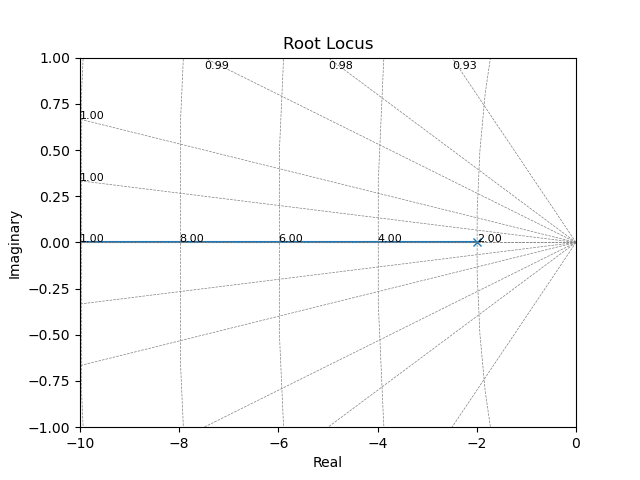

In [4]:
plt.figure()
_=ctrl.rlocus(G, xlim=[-10,0], ylim=[-1,1])

Para poder obtener la ganancia que nos ubica el polo en el -8 debemos hacer click en la figura del root locus en un punto cercano donde queremos ubicar el polo, siempre y cuando pase una linea azul sobre el punto en cuestión. Es decir que este punto pertenezca al lugar de las raíces.

Podemo ver que la ganancia que ubica al polo en -8 es $Kp=0.6$. Definimos esta constante en Pyhton y evaluamos a lazo cerrado el sistema.

In [5]:
Kp1 = 0.6

T1=ctrl.feedback(Kp1*G)
T1

TransferFunction(array([6.]), array([1., 8.]))

Podemos  ver que el polo del sistema a laza cerrado resultó donde pretendíamos.

Evaluemos la respuesta del sistema a lazo cerrado frente a un escalón.

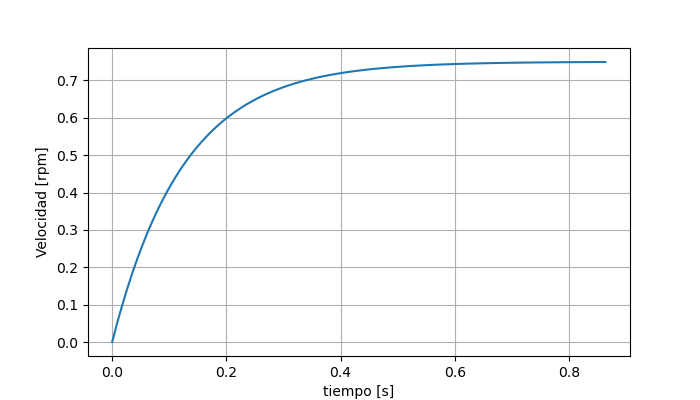

In [6]:
t1, y1 = ctrl.step_response(T1)
f, ax = plt.subplots(figsize=(7,4))
ax.plot(t1,y1)
ax.set_xlabel('tiempo [s]')
ax.set_ylabel('Velocidad [rpm]')
ax.grid();



Vemos el comportamiento exponencial típico de un sistema de primer orden.
Si queremos ver con presición el tiempo de establecimiento (además de otros parámetros), podemos usar el comando `step_info`


In [7]:
ctrl.step_info(T1)

{'RiseTime': 0.27910122339321763,
 'SettlingTime': 0.49714905416916894,
 'SettlingMin': 0.6800547489837577,
 'SettlingMax': 0.75,
 'Overshoot': 0,
 'Undershoot': 0,
 'Peak': 0.7492499999999986,
 'PeakTime': 0.8634694098727671,
 'SteadyStateValue': 0.75}

Vemos que cumple justo con el requeriemiento del tiempo de establecimiento. De esta información también podemos ver que el valor final (SteadyStateValue) es 0.75, por lo que el error es del 25%.

## Parte 2


Como el sistema es de tipo 0 y el controlador P no tiene polos en cero, para lograr que el error sea menor al 1% podemos utilizar la fórmula del error al escalón para sistema de tipo 0, que nos dice que el error es:

$$E=\frac{1}{1+kp}$$

donde $kp$ es la ganacia de posición del sistema a lazo abierto.

Para calcular el $kp$ del sistema a lazo abierto de tipo 0 con el compensador nos da:

$$k_p=\lim_{s\rightarrow 0}K_p\frac{10}{s+2}=5K_p$$


Entonces:

$$0.01 \le \frac{1}{1+k_p}=\frac{1}{1+5K_p} \implies K_p\ge 19.8$$








Entonces defino la constante del controlador porporcional usando la igualdad

In [8]:
Kp2=19.8

Ahora cierro el lazo

In [9]:
T2=ctrl.feedback(Kp2*G)
T2

TransferFunction(array([198.]), array([  1., 200.]))

Verifico la posición del polo a lazo cerrado

In [10]:
T2.pole()

array([-200.])

Podemos notar que la misma es mucho más grande que la obtenida en el punto anaterior, por lo que el sistema a lazo cerrado será mucho más rápido. Verificamos esto mediante simuación.


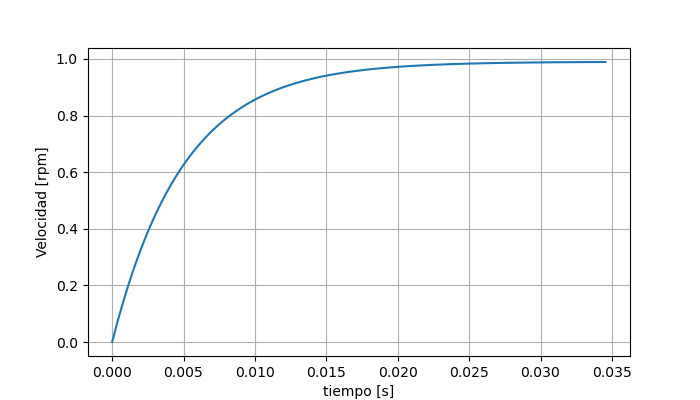

In [11]:
t2, y2 = ctrl.step_response(T2)
f, ax = plt.subplots(figsize=(7,4))
ax.plot(t2,y2)
ax.set_xlabel('tiempo [s]')
ax.set_ylabel('Velocidad [rpm]')
ax.grid();

Vemos que la forma de la respuesta es la misma típica del sistemas de primer orden, pero con tiempos mucho menores y un error más chico.

Para cuantificar obtengo el `step_info`


In [12]:
ctrl.step_info(T2)

{'RiseTime': 0.011164048935728706,
 'SettlingTime': 0.019885962166766757,
 'SettlingMin': 0.89767226865856,
 'SettlingMax': 0.99,
 'Overshoot': 0,
 'Undershoot': 0,
 'Peak': 0.989009999999998,
 'PeakTime': 0.03453877639491068,
 'SteadyStateValue': 0.99}

Vemos ahora que el error el valor final es de 0.99 por lo que el error es del 1% que es lo que buscabamos. El tiempo de establecimiento es de 0.02 aproximadamente, que es mucho menor al que obtuvimos anteriormente.

Este sistema controlado es más rápido y con menor error. Sin embargo presenta el problema que deberá alimentarse con valores más grander (u(t) mas grandes en general)

Comparemos los valores de $u(t)$ para los dos sistemas anteriores. Para esto defino T1u y T2u que son las transferencias de la r(t) hacia la u(t).


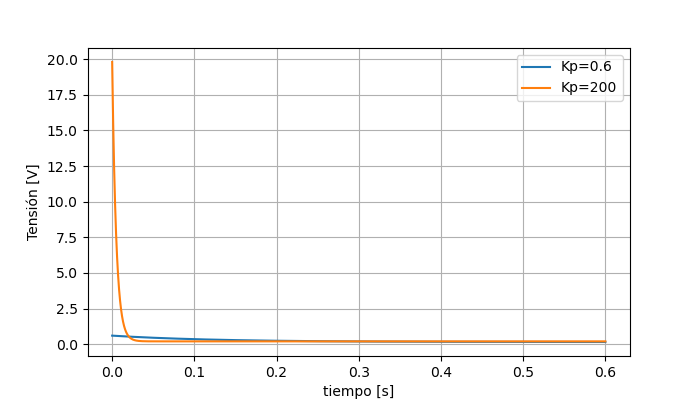

In [13]:
tsim =np.linspace(0,0.6,1000)
T1u=ctrl.feedback(Kp1, G)
T2u=ctrl.feedback(Kp2, G)
t1u, y1u = ctrl.step_response(T1u, tsim)
t2u, y2u = ctrl.step_response(T2u, tsim)

f, ax = plt.subplots(figsize=(7,4))
ax.plot(t1u,y1u, label="Kp=0.6")
ax.plot(t2u,y2u, label="Kp=200")
ax.set_xlabel('tiempo [s]')
ax.set_ylabel('Tensión [V]')
ax.legend()
ax.grid();

Podemos ver como el segundo cado requerió de valores mucho más grandes a la entrada. Esto, dependiendo del sistema puede ser inadmisible.

Para poder coumplir con ambos requerimientos sin sobreexigir al sistema utilizaremos un controlador PI.


## Parte 3

Para este caso, si ubicamos el cero sobre el primer (y único ) polo del sistema luego de realimentar tendremos a la salida el efecto del polo del integrador, que de desplazará por efecto de la realimentación.

Debido a que agrengando un PI el sistema se transforma en tipo 1 el error en estado estacionario será 0.

Solamente queda definir una ganancia del controlador PI que podemos obtenerla con la ayuda del lugar de las raíces.

Como ya sabemos donde ubicaremos el polo y el cero definimos el controlador sin la ganancia:


In [14]:
PI = ctrl.tf([1,2],[1,0])
PI

TransferFunction(array([1, 2]), array([1, 0]))

1 states have been removed from the model


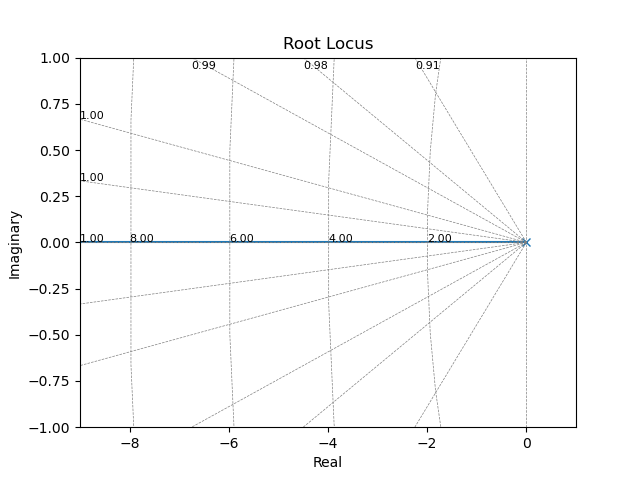

In [15]:
plt.figure()
_=ctrl.rlocus(ctrl.minreal(PI*G), xlim=[-9,1]);

Como el efecto del polo y el cero se cancelan el sistema se seguirá comportando como uno de primer orden. Por lo que sigue valiendo el resultado obtenido en el punto 1 e debemos ubicar el polo en -8. Del lugar de las raíces obtenemos el $Ki$ que ubica el polo en -8.


In [16]:
ki=1/np.abs((PI*G)(-8))
ki

0.8

In [17]:
Ki=0.8
T3=ctrl.feedback(Ki*PI*G)
T3

TransferFunction(array([ 8., 16.]), array([ 1., 10., 16.]))

In [18]:
T3.pole()

array([-8., -2.])

In [19]:
T3.zero()

array([-2.])

Es importante notar que aunque el polo en -2 no se vea a la salida por la presencia del cero, el mismo sigue estando presente. **Este tipo de cancelación solamente se pueden hacer en la zona establa del plano s**. 

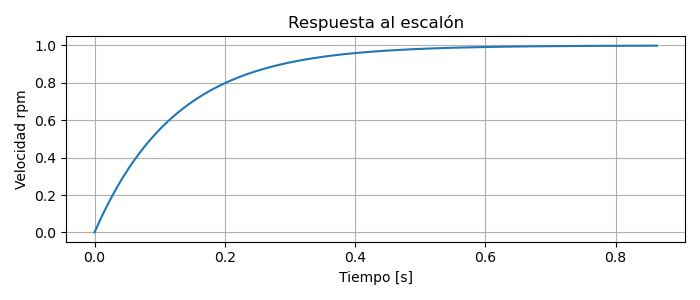

In [20]:
t3, y3 = ctrl.step_response(T3)
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(t3, y3)
ax.grid()
ax.set_title('Respuesta al escalón')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Velocidad rpm');
fig.tight_layout();


In [21]:
ctrl.step_info(T3)

{'RiseTime': 0.27910122339321763,
 'SettlingTime': 0.49714905416916894,
 'SettlingMin': 0.9067396653116769,
 'SettlingMax': 1.0,
 'Overshoot': 0,
 'Undershoot': 0,
 'Peak': 0.9989999999999982,
 'PeakTime': 0.8634694098727671,
 'SteadyStateValue': 1.0}

## Parte 4

En esta parte ubicaremos los polos en la posición excata donde se deberían para la cual se cumplirían los objetivos de control si el sistema fuese de segundo orden puro.

Ya sabemos que el $\sigma$ tiene que ser mayor que 8.

Por otro lado el $\zeta$ tiene que ser tal que el sobrevalor sea menor a 20%.
 
Calculamos el sobrevalor para distintos valores de $\zeta$ y obtenemos que:


Vemos claramente que el sistema no tiene sobrevalor, su tiempo de asentamiento de es de 0.5 aproximadamente y su error en estado estacionario es 0.

De esta manera logramos todos los objetivos de control de forma correcta.



In [22]:
zeta = 0.46
sv=np.exp(-np.pi*zeta/np.sqrt(1-zeta**2))
sv

0.19641014802711199

Con el valor de $\zeta$ y el de $\sigma$ podemos obtener el de $\omega_n$.

In [23]:
wn=sigma/zeta
wn

17.391304347826086

Y luego podemos también obtener el valor de $\omega_d$

In [24]:
wd=wn*np.sqrt(1-zeta**2)
wd

15.442068090729123

In [25]:
pobj = -sigma + 1j*wd
pobj

(-8+15.442068090729123j)

Sabemos que debemos colocar un polo en 0, por que el controlador es PI. Nos queda decidir donde ubicar el cero de PI. Si queremos que los polos del sistema a lazo cerrado estén en la ubicación de `pobj` debemos hacer que `pobj` pertenezca al lugar de las raíces. Para esto la fase de $G.PI$ debe ser 180 grados en `pobj`.

Para lograr que se cumpla esto el cero debe agregar la fase suficiente para que $(G.PI)(pobj)$ sea 180 grados.

Entonces evaluaremos las fase del sistema sin el cero de PI, es decir la planta más un polo en cero.

Defino primero un sistema integrador


In [26]:
I=ctrl.tf([1],[1,0])
I

TransferFunction(array([1]), array([1, 0]))

Y evaluamos (G.I) en `pobj`

In [27]:
np.angle((G*I)(pobj), deg=True)

131.37930522759916

Vamos a obtener cuantos grados tiene que agregar el cero (en radianes). Este es el $\pi $ menos el ángulo que obtuvimos antes en radianes.

In [28]:
theta = np.pi-np.angle((G*I)(pobj))

Luego por trigonometría podemos obtener el valor de la ubicación del cero.

In [29]:
cpi=-(sigma+wd/np.tan(theta))
cpi

-21.604104779908187

Ahora podemos definir el PI. Sin embargo nos falta aún la ganacia del PI. Esta la obtendremos del lugar de las raíces. Para esto defino el PI sin la ganacia.

In [30]:
PI=ctrl.tf([1, -cpi],[1,0])
PI

TransferFunction(array([ 1.        , 21.60410478]), array([1, 0]))

Obtengo el lugar de las raíces y con el puntero hago clicl sobre el punto del `pobj` que si hicimos bien las cuentas tendrá una linea del lugar de las raíces sobre el mismo.

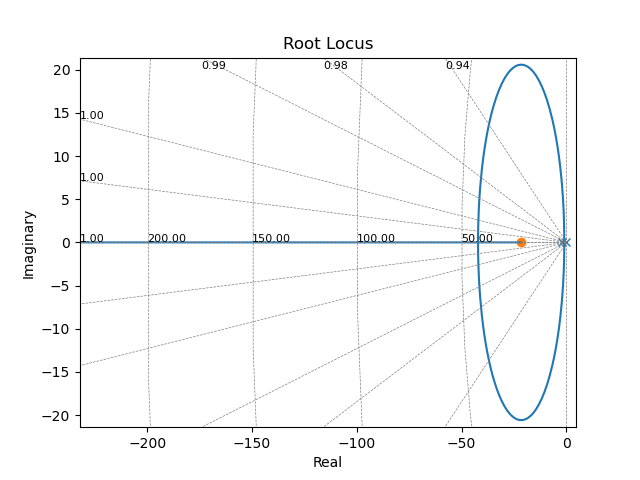

In [31]:
plt.figure()
ctrl.rlocus(G*PI);

In [32]:
ki=1/np.abs((G*PI)(pobj))
ki

1.4

Podemos ver que la ganancia que ubica el polo en pobj es aproximadamente 1.4. Ahora si tenemos el compensador completo y podemos cerrar el lazo.

In [33]:
T4=ctrl.feedback(PI*G*1.4)
t4, y4 = ctrl.step_response(T4)
T4.pole()

array([-8.+15.44206809j, -8.-15.44206809j])

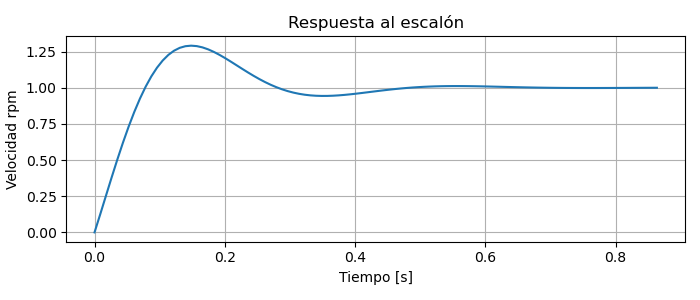

In [34]:
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(t4, y4)
ax.grid()
ax.set_title('Respuesta al escalón')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Velocidad rpm');
fig.tight_layout();

In [35]:
T4.pole()

array([-8.+15.44206809j, -8.-15.44206809j])

Podemos notar claramente que si bien el sistema tiene los polos donde pretendíamos, la repuesta dinámica no es exactamente la que queríamos. Esto se debe a que el sistema no es un segundo orden puro sino que presenta además un cero.
Este cero afecta la respuesta transitoria fundamentalmente aumentado el sobrevalor y disminuyendo el risetime.

Estos valores los podemos ver usando el `step_info`

In [36]:
ctrl.step_info(T4)

{'RiseTime': 0.06105339261726632,
 'SettlingTime': 0.4448175747829403,
 'SettlingMin': 0.9248461624060922,
 'SettlingMax': 1.2903977006457732,
 'Overshoot': 29.039770064577333,
 'Undershoot': 0,
 'Peak': 1.2903977006457732,
 'PeakTime': 0.14827252492764678,
 'SteadyStateValue': 0.9999999999999999}

## Diseño de PD

Planta a controlar:

$$G(s)=\frac{1}{(s+1)(s+3)}$$

Objetivos de control
-  SV  5%
-  Tiempo de asentamiento al 2% en 1 segundo.

Del tiempo de asentamiento se obtiene que $\sigma=4$

In [37]:
sigma=4

Calculo de coeficiente de amortiguamiento para el sobrevalor del 5%.

In [38]:
zeta=0.69
sv=np.exp(-zeta*np.pi/np.sqrt(1-zeta**2))
sv

0.050044240468647604

Con estos dos valores puedo obtener $\omega_n$ y $\omega_d$.

In [39]:
wn = sigma/zeta
wd = wn*np.sqrt(1-zeta**2)

print(wn, wd)

5.797101449275363 4.195996331408133


Entonces los polos objetivos serán

$$ p_{obj}=-\sigma\pm j\omega_d = -4 \pm j4$$

In [40]:
G=ctrl.tf(1,[1,4,3])
G

TransferFunction(array([1]), array([1, 4, 3]))

In [41]:
pobj=-sigma+wd*1j
pobj


(-4+4.195996331408133j)

Para lograr que el sistema a lazo cerrado tenga los polos en la posición `pobj` debemos hacer que la fase del sisema a lazo abierto sea 180 grados.

Para lograr esto primero calculamos la fase de la planta sin compensar en $pobj$.

In [42]:
np.angle(G(pobj), deg=True)

131.03165793978056

Como vemos, la fase en ese punto es 131 grados y debería ser 180. Es necesario **aumentar** la fase en un valor cercano a 50 grados.

Esto hace imposible el uso de PI, ya que este tipo de controladores **disminuye la fase** en todo el semiplano real negativo de $s$.

Por lo tanto la solución es poner un PD. Debido a que el PD es un cero, debemos ubicarlo de forma tal que este agregué el ángulo faltante.

Utilizando trigonometría, la posición del 0 resulta en:

In [43]:
x=wd/np.tan(np.pi-np.angle(G(pobj)))
z=-(sigma+x)
z

-7.651596303297627

Ahora podemos definir el PD.

In [44]:
PD=ctrl.tf([1,-z],[1])
PD

TransferFunction(array([1.       , 7.6515963]), array([1]))

Si realizamos bien las cuentas, entonces `(G*PD)(pobj)` tienen que tener fase 180 grados.

In [45]:
np.angle((G*PD)(pobj), deg=True)

-180.0

Por lo tanto `pobj` tiene que  ser parte del lugar de las raíces.

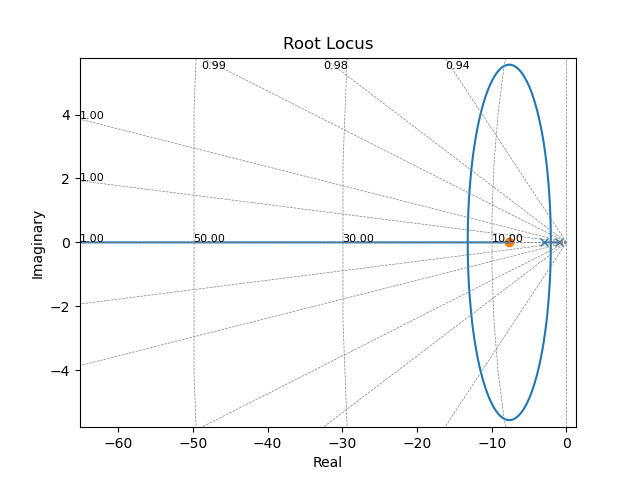

In [46]:
f=plt.figure()
_=ctrl.rlocus(G*PD)


Haciendo clicl sobre el lugar de las raíces el punto `pobj` nos devolverá el valor de gananciar para el cual el sistema a lazo cerrado tiene uno de los polos en `pobj`. Este valor lo podemos calcular usando el criterio de magnitud.

In [47]:
K=1/np.abs((G*PD)(pobj))
K

4.000000000000001

Finalmente ahora podemos cerrar el lazo y vefificar la posición de los polos.

In [48]:
T5=ctrl.feedback(K*PD*G)
T5.pole()

array([-4.+4.19599633j, -4.-4.19599633j])

Ahroa hacemos la simulación a lazo cerrado.

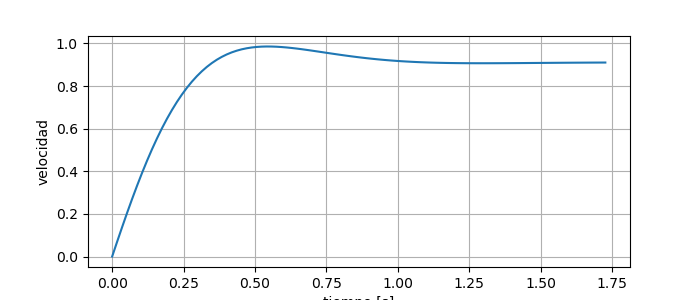

In [49]:
t5, y5 = ctrl.step_response(T5)
f, ax = plt.subplots(figsize=(7,3))
ax.plot(t5, y5)
ax.grid()
ax.set_xlabel('tiempo [s]')
ax.set_ylabel('velocidad')
fig.tight_layout()

In [50]:
ctrl.step_info(T5)

{'RiseTime': 0.24421357046906553,
 'SettlingTime': 0.9070789760279576,
 'SettlingMin': 0.820352850879964,
 'SettlingMax': 0.9855409083716947,
 'Overshoot': 8.214240850052594,
 'Undershoot': 0,
 'Peak': 0.9855409083716947,
 'PeakTime': 0.5407586203243594,
 'SteadyStateValue': 0.9107312500000001}

## Diseño PD más filtro

Podemos agregar el polo necesario para que el derivados sea realizable y evitar problemas de ruidos que pueden incluir los derivadores puros.

De esta forma, ahora tenemos 2 grados libertad para hacer que nuestro lugar de las raíces pase por donde nosotros deseamos: la posición del cero del derivador y la posición del polo del filtro.

Debemos tener algún criterio para seleccionar la ubicación de alguno de los dos. Un criterio útil es ubicar el cero en el segundo polo dominante.

Para este caso el cero debería estar en -3.

El polo lo seleccionamos para que el lugar de las raíces pase por donde queremos.


Primero veamos que resulta con el segundo polo cancelado.


In [51]:
s = ctrl.tf('s')
Z1=(s+3)

In [52]:
np.angle((G*Z1)(pobj), deg=True)

-125.56352668655661

Ahora vemos que el sistema tiene una fase de -125 grados. Para que la fase sea -180 debemos quitar 55 grados. Para esto es necesario un polo.

La ubicación del polo la obtenemos de la misma manera que obtuvimos la ubicación del cero en el caso anterior, es decir usando tringonometría.

In [53]:
theta=(np.angle((G*Z1)(pobj))+np.pi)
theta*180/np.pi

54.43647331344338

In [54]:
x=wd/np.tan((np.angle((G*Z1)(pobj))+np.pi))
p1=-(x+sigma)

La ubicación del polo resulta entonces:

In [55]:
p1

-7.000000000000001

Y por lo tanto el PD más el filtro resulta:

In [56]:
PDf=(s+3)/(s+7)
PDf

TransferFunction(array([1, 3]), array([1, 7]))

Verficamos ahora que la planta con el PD con filtro haga que el lugar de las raíces pase por ese punto.

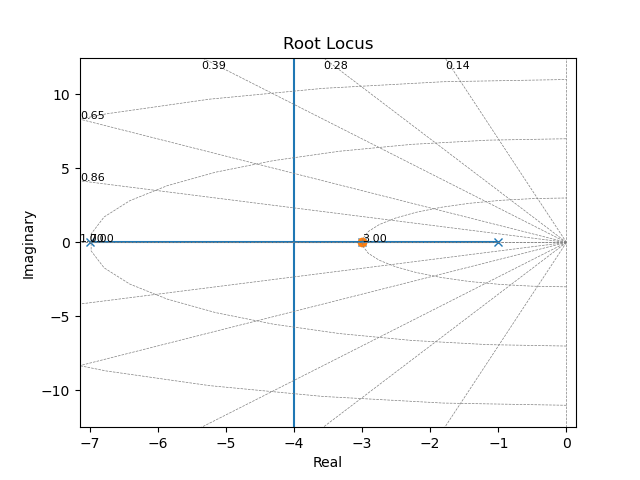

In [57]:
plt.figure()
_=ctrl.rlocus(G*PDf)

O en forma analítica verificando que se cumple el criterio de fase:


In [58]:
np.angle((G*PDf)(pobj), deg= True)

-180.0

De la figura anterior, del criterio de magnitud debemos obtener el valor de K.

In [59]:
K=1/np.abs((G*PDf)(pobj))
K

26.60638521319051

Ahora que verificamos que todo esta donde se pretendía podemos cerrar el lazo:

In [60]:
T6=ctrl.feedback(G*PDf*K)
T6

TransferFunction(array([26.60638521, 79.81915564]), array([  1.        ,  11.        ,  57.60638521, 100.81915564]))

Con el sistema a lazo cerrado podemos comprobar que los polos están donde en `pobj`.

In [61]:
T6.pole()

array([-4.+4.19599633j, -4.-4.19599633j, -3.+0.j        ])

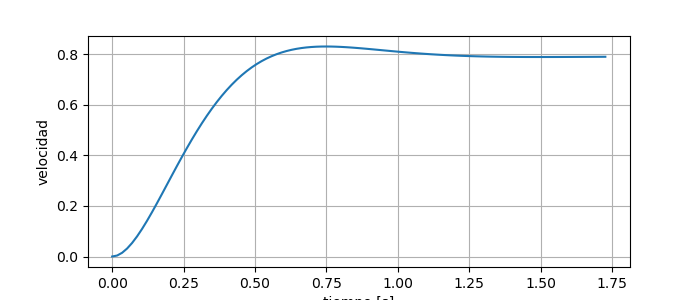

In [62]:
t6, y6 = ctrl.step_response(T6)
f, ax = plt.subplots(figsize=(7,3))
ax.plot(t6, y6)
ax.grid()
ax.set_xlabel('tiempo [s]')
ax.set_ylabel('velocidad')
fig.tight_layout()

In [63]:
ctrl.step_info(T6)

{'RiseTime': 0.3663203557035983,
 'SettlingTime': 1.0466295877245666,
 'SettlingMin': 0.717517552921188,
 'SettlingMax': 0.831325338297773,
 'Overshoot': 5.00426620325063,
 'Undershoot': 0,
 'Peak': 0.831325338297773,
 'PeakTime': 0.7500845378692726,
 'SteadyStateValue': 0.7917062500000001}

## Eliminar el error de estado estacionario con PI.

Para lograr este objetivo tenemos que hacer que nuestro PI no modifique la dinámica del sistema. Este se traduce a que no cambie de forma fuertemente el lugar de las raíces que tenemos luego de agregar el PDf.

Para que no modifique el lugar de las raíces podemos agregar además del polo en cero un cerca bien cerca de este. De esta forma los dos vectores quedan que casi iguales donde un aporte en `pobj` casi nulo. Sin embargo el sistema pasa a ser de tipo 1.

La desventaja de este diseño es que para que moleste poco el PI a lo diseñado antes el cero tiene que estar muy cerca del polo lo que hace que el sistema tarde mucho en compensar el error de estado estacionario.

A modo de demostración de lo que estamos diciendo podemos probar con distintas posiciones del cero (respecto de la posición del $\omega_n$ de `pobj`):


In [64]:
wn/20

0.2898550724637682

In [65]:
PI1=(s+wn/20)/s
Tc1=ctrl.feedback(G*PI1*PDf*K)
Tc1.pole()

array([-3.87843833+4.08389809j, -3.87843833-4.08389809j,
       -3.        +0.j        , -0.24312334+0.j        ])

In [66]:
PI2=(s+wn/10)/s
Tc2=ctrl.feedback(G*PI2*PDf*K)
Tc2.pole()

array([-3.74055042+3.96645066j, -3.74055042-3.96645066j,
       -3.        +0.j        , -0.51889917+0.j        ])

In [67]:
PI3=(s+wn/5)/s
Tc3=ctrl.feedback(G*PI3*PDf*K)
Tc3.pole()

array([-3.39162814+3.72152647j, -3.39162814-3.72152647j,
       -3.        +0.j        , -1.21674373+0.j        ])

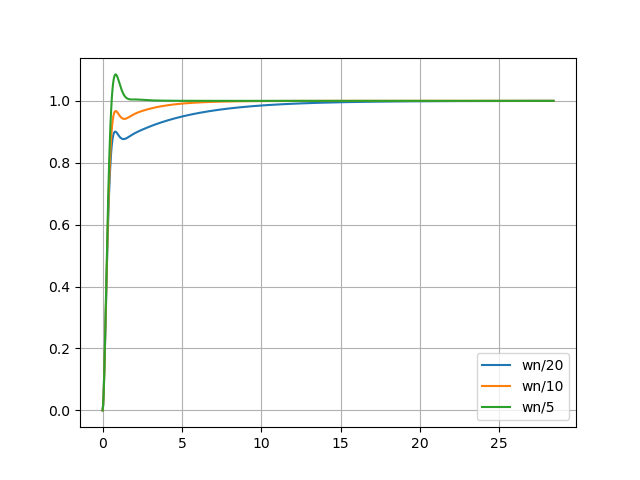

In [68]:
tc1, yc1 = ctrl.step_response(Tc1)
tc2, yc2 = ctrl.step_response(Tc2, T=tc1)
tc3, yc3 = ctrl.step_response(Tc3, T=tc1)


fig, ax = plt.subplots()
ax.plot(tc1, yc1, label='wn/20')
ax.plot(tc2, yc2, label='wn/10')
ax.plot(tc3, yc3, label='wn/5')
ax.grid()
ax.legend();

Ahora podemos ver como alejar el cero el pol el cero hace que la repuesta tenga un mayor sobrevalor pero a su vez reduce más rápidamente el error a cero.

## Ejercicio.

1. Resolver el problema anterior, con la misma planra y los mismos requerimientos, pero usando los siguientes criterior:
- primero diseñar el PI con el criterior de ubicar el cero en el primer polo dimanate
- luego diseñar un PD con filtro utilizando el criterio de cancelar el segundo polo dominante.
1. Veificar que la posición del polo del filtro del PD es la correcta mediante el criterio de fase y magitud y mediante el gráfico del lugar de las raíces.
1. Cerar el lazo verificar y verificar los polos a lazo cerrado.
1. Simular la repuesta al escalón y comparar los resultados con lo resuelto en clases.

In [91]:
G=1/((s+1)*(s+3))
G


TransferFunction(array([1]), array([1, 4, 3]))

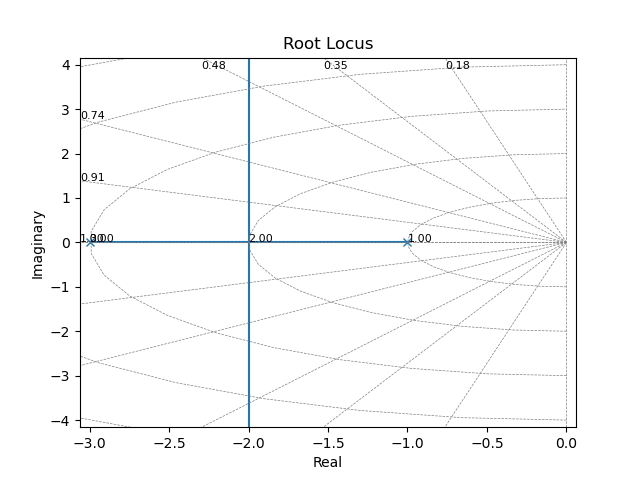

In [92]:
plt.figure()
ctrl.rlocus(G);

In [94]:
G.pole()

array([-3., -1.])

Para anular el polo más rápido, más dominante, el -1, colocamos el cero en ese lugar, y la ganancia se calcula por el método de fase.

En primer lugar vemos qué resulta con el polo cancelado

In [95]:
ZPI=(s+1)/s
ZPI

TransferFunction(array([1, 1]), array([1, 0]))

In [104]:
np.angle((ZPI*G)(pobj), deg=True)

122.96507575848288

In [99]:
thetaPI = np.pi-np.angle((G*ZPI)(pobj))
thetaPI
thetaPI*180/np.pi

57.034924241517125

Ahora calculamos el PD

In [106]:
ZPD=(s+3)
np.angle((ZPI*G*ZPD)(pobj), deg=True)


-133.6301088678543

El polo lo seleccionamos para que el lugar de las raíces pase por donde queremos.


Primero veamos que resulta con el segundo polo cancelado.

Ahora vemos que el sistema tiene una fase de -133 grados. Para que la fase sea -180 debemos quitar 46 grados. Para esto es necesario un polo.

La ubicación del polo la obtenemos de la misma manera que obtuvimos la ubicación del cero en el caso anterior, es decir usando tringonometría.

In [107]:
theta=(np.angle((G*ZPI*ZPD)(pobj))+np.pi)
theta*180/np.pi

46.3698911321457

In [108]:
x=wd/np.tan((np.angle((G*ZPI*ZPD)(pobj))+np.pi))
pPIPD=-(x+sigma)

La ubicación del polo resulta entonces:

In [109]:
pPIPD

-7.999999999999999

Verficamos ahora que la planta con el PI y el PD con filtro haga que el lugar de las raíces pase por ese punto.

In [118]:
PDf=ZPD/(s+8)
PDf
PIPDf=PDf*ZPI
PIPDf

TransferFunction(array([1, 4, 3]), array([1, 8, 0]))

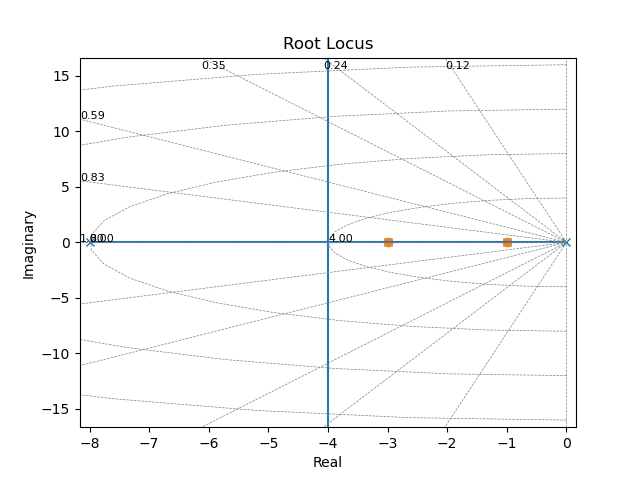

In [119]:
plt.figure()
ctrl.rlocus(G*PIPDf);

En forma analítica verificando que se cumple el criterio de fase:

In [120]:
np.angle((G*PIPDf)(pobj), deg= True)

-180.0

De la figura anterior, del criterio de magnitud debemos obtener el valor de K.

In [121]:
KPIPDf=1/np.abs((G*PIPDf)(pobj))
KPIPDf

33.60638521319051

Cerramos el Lazo

In [123]:
H=ctrl.feedback(G*KPIPDf*PIPDf)
H

TransferFunction(array([ 33.60638521, 134.42554085, 100.81915564]), array([  1.        ,  12.        ,  68.60638521, 158.42554085,
       100.81915564]))

Buscamos los polos


In [124]:
H.pole()

array([-4.+4.19599633j, -4.-4.19599633j, -3.+0.j        , -1.+0.j        ])

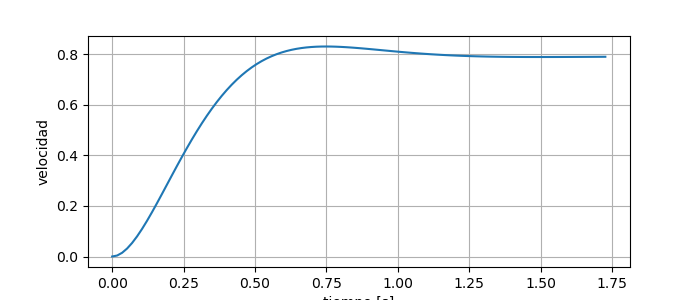

In [125]:
t, y = ctrl.step_response(H)
f, ax = plt.subplots(figsize=(7,3))
ax.plot(t6, y6)
ax.grid()
ax.set_xlabel('tiempo [s]')
ax.set_ylabel('velocidad')
fig.tight_layout()

In [126]:
ctrl.step_info(H)

{'RiseTime': 0.36632035570359833,
 'SettlingTime': 1.0466295877245668,
 'SettlingMin': 0.906292646952311,
 'SettlingMax': 1.050042662032506,
 'Overshoot': 5.004266203250607,
 'Undershoot': 0,
 'Peak': 1.050042662032506,
 'PeakTime': 0.7500845378692729,
 'SteadyStateValue': 1.0}

| Variable | Controlador anterior | Este Controlador |
| --- | --- | --- |
| 'RiseTime' | 0.366 | 0.366 |
| SettlingTime | 1.04 | 1.04 |
| SettlingMin' | 0.71 | 0.90 |
| 'SettlingMax' | 0.83 | 1.05 | 
| Overshoot' |  5.00 | 5.00 |
| 'Undershoot' | 0 | 0 |
| 'Peak' | 0.83 | 1.05 |
| 'PeakTime' | 0.75 | 0.75 |
| SteadyStateValue | 0.79 | 1 |